In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
#Read Data

full_df = pd.read_csv("../../MVP/Data/full_df.csv")

index_df = full_df[full_df['category'] == 'Index']
index_df['dates'] = index_df['dates'].astype('datetime64[ns]')

dji_df = index_df.loc[index_df['stock'] == 'DJI']
inx_df = index_df.loc[index_df['stock'] == '.INX']

#ndaq_df = index_df.loc[index_df['stock'] == 'NDAQ'] - NASDAQ NOT AVAILABLE ON ALPHA VANTAGE API.

carz_df = full_df.loc[full_df['stock'] == 'CARZ']
carz_df['dates'] = carz_df['dates'].astype('datetime64[ns]')

ftxg_df = full_df.loc[full_df['stock'] == 'FTXG']
ftxg_df['dates'] = ftxg_df['dates'].astype('datetime64[ns]')

iyz_df = full_df.loc[full_df['stock'] == 'IYZ']
iyz_df['dates'] = iyz_df['dates'].astype('datetime64[ns]')

pdbc_df = full_df.loc[full_df['stock'] == 'PDBC']
pdbc_df['dates'] = pdbc_df['dates'].astype('datetime64[ns]')

xrt_df = full_df.loc[full_df['stock'] == 'XRT']
xrt_df['dates'] = xrt_df['dates'].astype('datetime64[ns]')


/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [3]:
#create percentage column
def close_pct(df):
    df['close_pct'] = round(100 * (df['close'] / int(df.loc[df['dates'] =='2020-01-28']['close'].values)),2)
    return df

dji_df = close_pct(dji_df)
#ndaq_df = close_pct(ndaq_df) - NASDAQ NOT AVAILABLE WITH ALPHA VANTAGE API.
inx_df = close_pct(inx_df)
carz_df = close_pct(carz_df)
ftxg_df = close_pct(ftxg_df)
xrt_df = close_pct(xrt_df)
iyz_df = close_pct(iyz_df)
pdbc_df = close_pct(pdbc_df)

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#plot function
def plot_data(ind_avg, stonk, title, leg1, leg2):
    
    leglist = [leg1, leg1 + " (Best Fit)", leg2, leg2 + " (Best Fit)"]
    
    #sort ind avg dates
    ind_avg = ind_avg.sort_values('dates', ascending=True)
    
    #filter to crash only
    ind_avg_crash = (ind_avg['dates'] >= '2020-01-28')
    ind_avg_crash_df = ind_avg.loc[ind_avg_crash]
    
    #sort stock dates
    stonk = stonk.sort_values('dates', ascending=True)
    
    #filter to crash only
    stonk_crash = (stonk['dates'] >= '2020-01-28')
    stonk_crash_df = stonk.loc[stonk_crash]

    #plot
    fig = plt.figure(figsize=(20,10))
    
    ax = fig.add_subplot(211)
    ind_avg_crash_df.plot(y='close_pct', x='dates', kind='line', ax=ax, color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Percent')
    plt.title(title)
    plt.grid()
    plt.yticks(np.arange(60,115,step=5))
    plt.ylim(60,115)
    
    x_avg = mdates.date2num(ind_avg_crash_df['dates'].tolist())
    y_avg = ind_avg_crash_df['close_pct'].tolist()
    z_avg = np.polyfit(x_avg, y_avg, 12)
    p_avg = np.poly1d(z_avg)
    plt.plot(x_avg, p_avg(x_avg), 'r--')
    
    ax = fig.add_subplot(211)
    stonk_crash_df.plot(y='close_pct', x='dates', kind='line', ax=ax, color='green')
    plt.xlabel('Date')
    plt.ylabel('Close Percent')
    plt.grid()
    plt.yticks(np.arange(60,115,step=5))
    plt.ylim(60,115)
    
    x_stonk = mdates.date2num(stonk_crash_df['dates'].tolist())
    y_stonk = stonk_crash_df['close_pct'].tolist()
    z_stonk = np.polyfit(x_stonk, y_stonk, 12)
    p_stonk = np.poly1d(z_stonk)
    plt.plot(x_stonk, p_stonk(x_stonk), 'g--')
    
    plt.legend(leglist, loc='best')

    plt.tight_layout()
    plt.savefig('plots/' + title + '.svg')

    plt.show()
    
    return ax

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


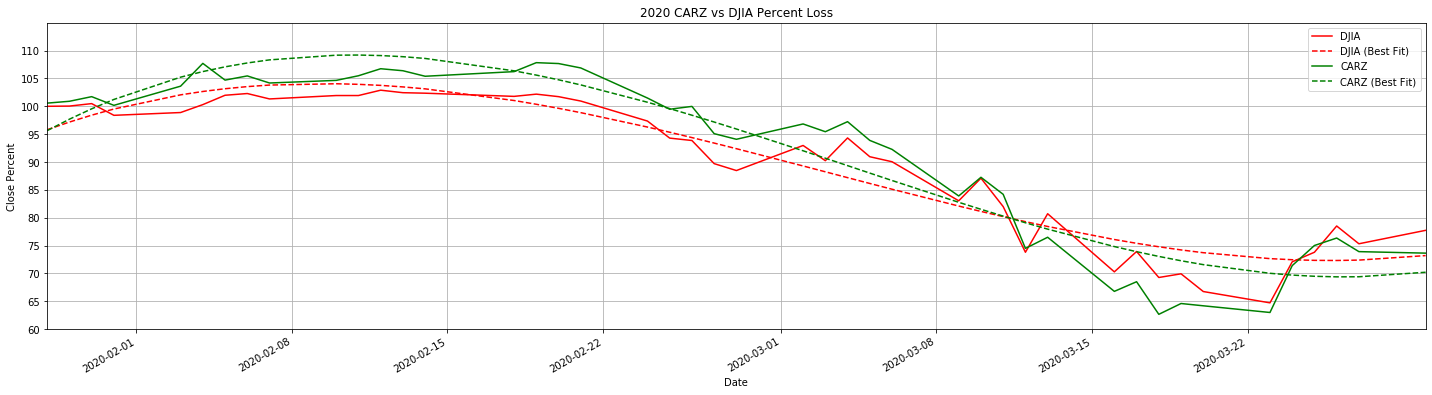

In [5]:
CARZ_DJI_chart = plot_data(dji_df, carz_df, '2020 CARZ vs DJIA Percent Loss', 'DJIA', 'CARZ')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


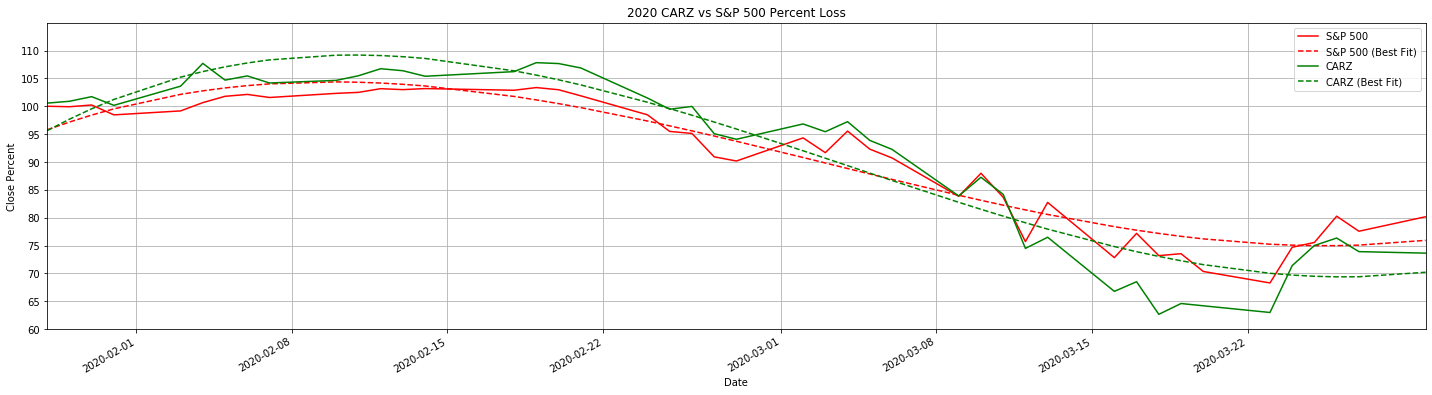

In [6]:
CARZ_INX_chart = plot_data(inx_df, carz_df, '2020 CARZ vs S&P 500 Percent Loss', 'S&P 500', 'CARZ')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


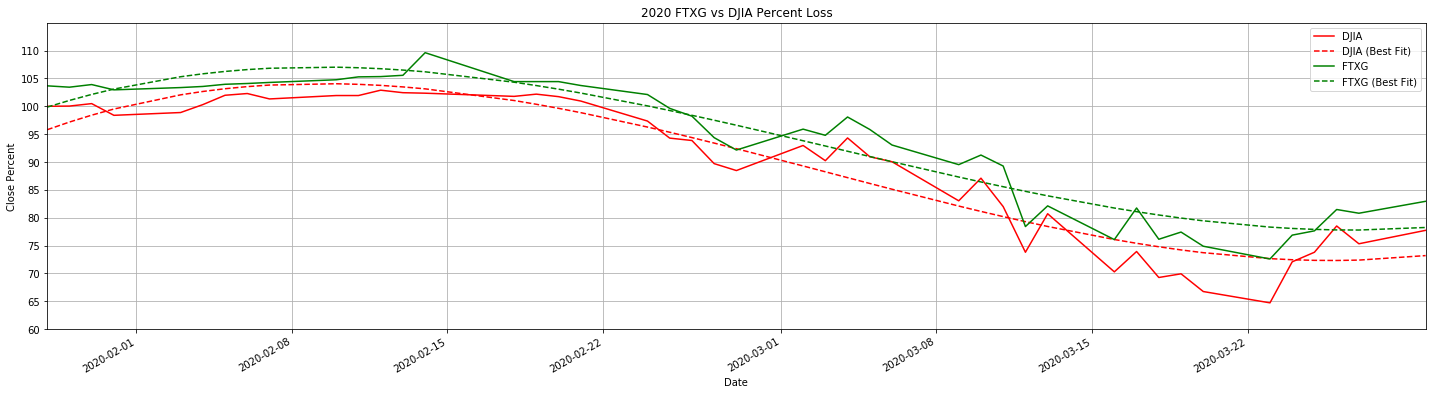

In [7]:
FTXG_DJI_chart = plot_data(dji_df, ftxg_df, '2020 FTXG vs DJIA Percent Loss', 'DJIA', 'FTXG')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


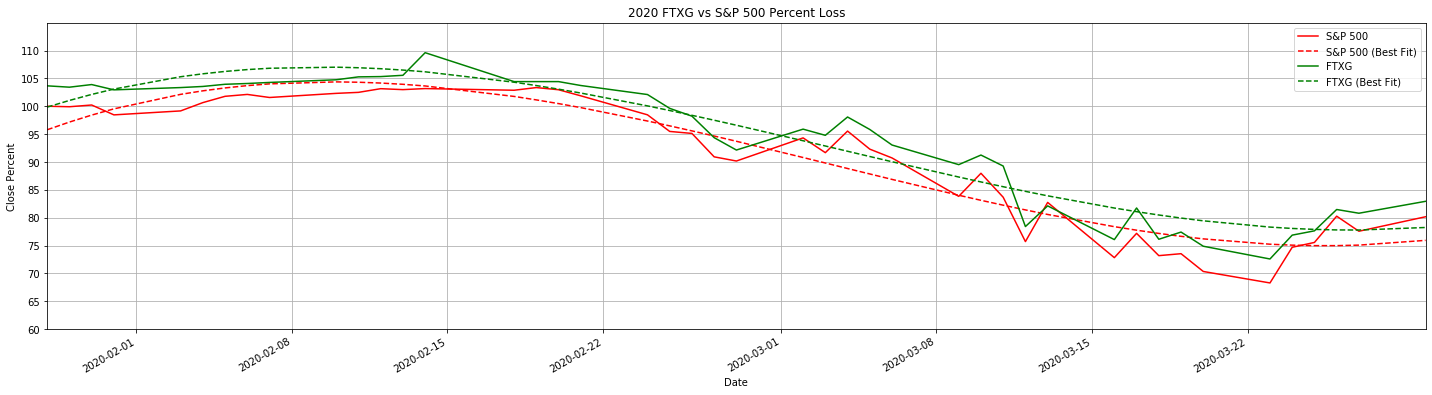

In [8]:
FTXG_INX_chart = plot_data(inx_df, ftxg_df, '2020 FTXG vs S&P 500 Percent Loss', 'S&P 500', 'FTXG')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


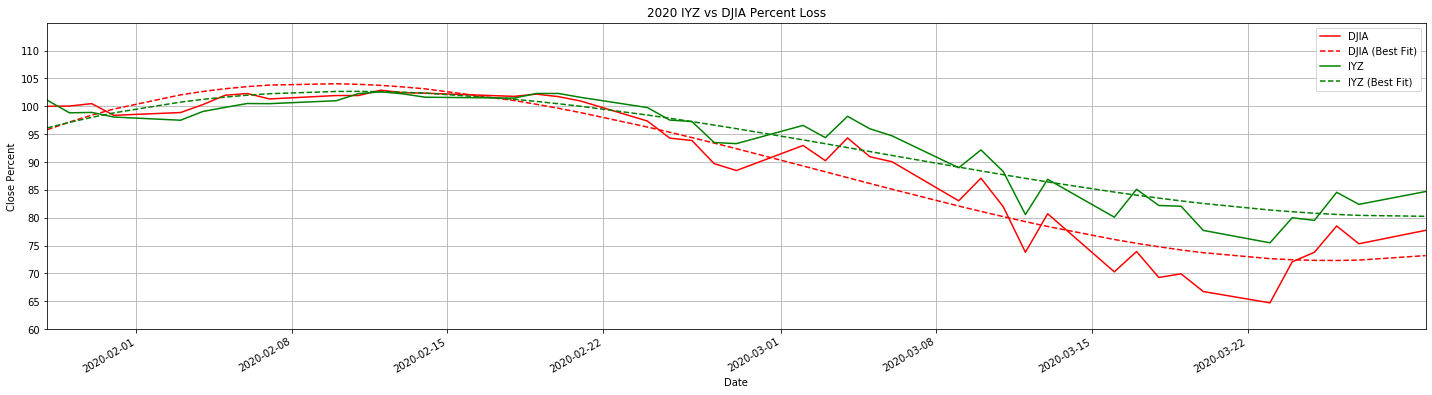

In [9]:
IYZ_DJI_chart = plot_data(dji_df, iyz_df, '2020 IYZ vs DJIA Percent Loss', 'DJIA', 'IYZ')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


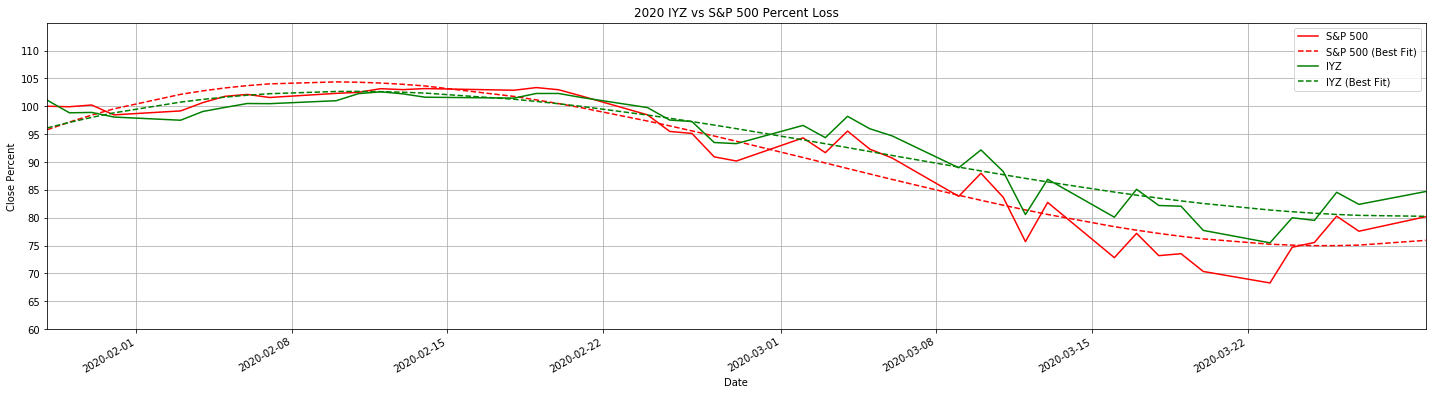

In [10]:
IYZ_INX_chart = plot_data(inx_df, iyz_df, '2020 IYZ vs S&P 500 Percent Loss', 'S&P 500', 'IYZ')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


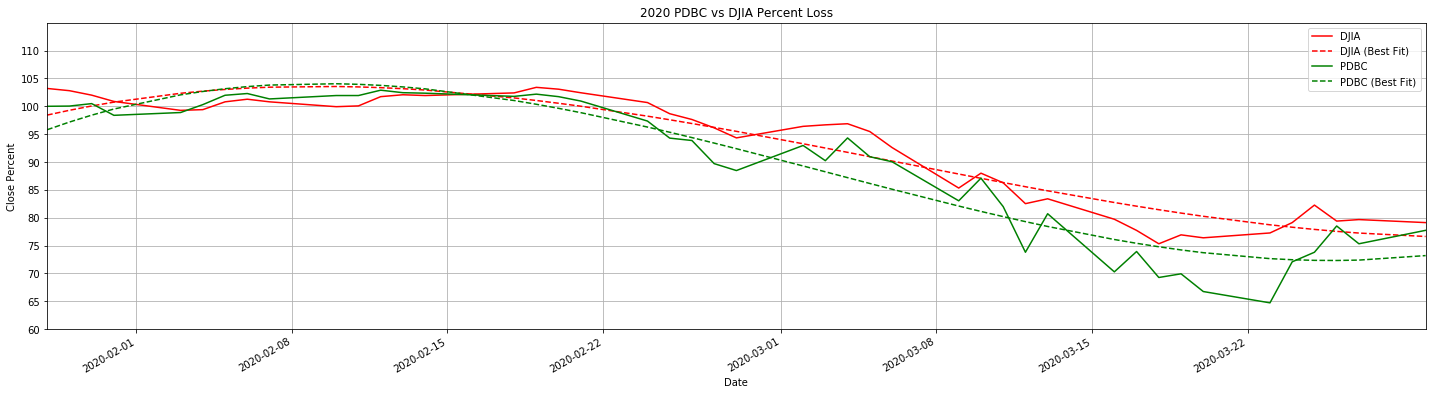

In [11]:
PDBC_DJI_chart = plot_data(pdbc_df, dji_df, '2020 PDBC vs DJIA Percent Loss', 'DJIA', 'PDBC')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


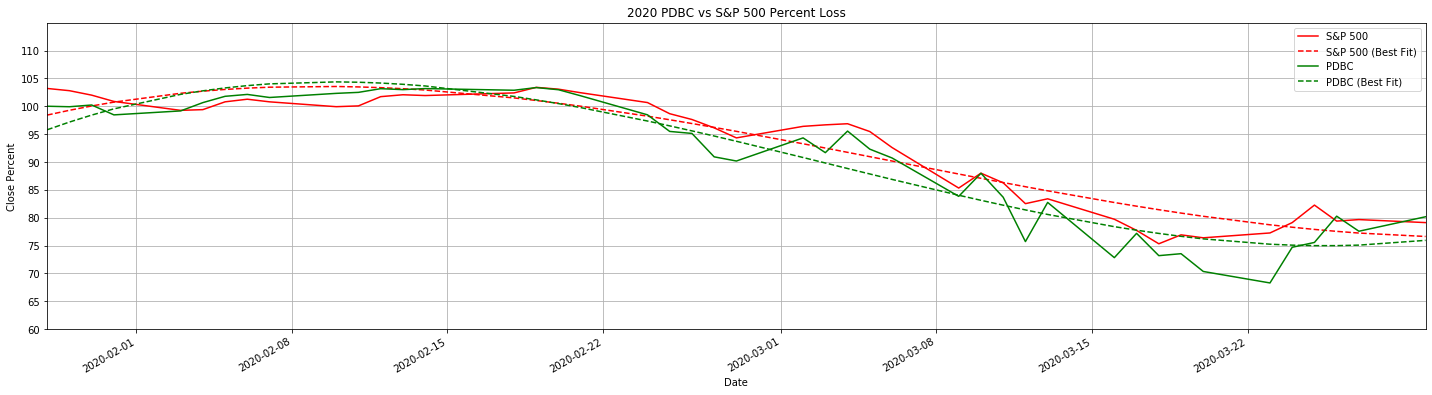

In [12]:
PDBC_INX_chart = plot_data(pdbc_df, inx_df, '2020 PDBC vs S&P 500 Percent Loss', 'S&P 500', 'PDBC')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


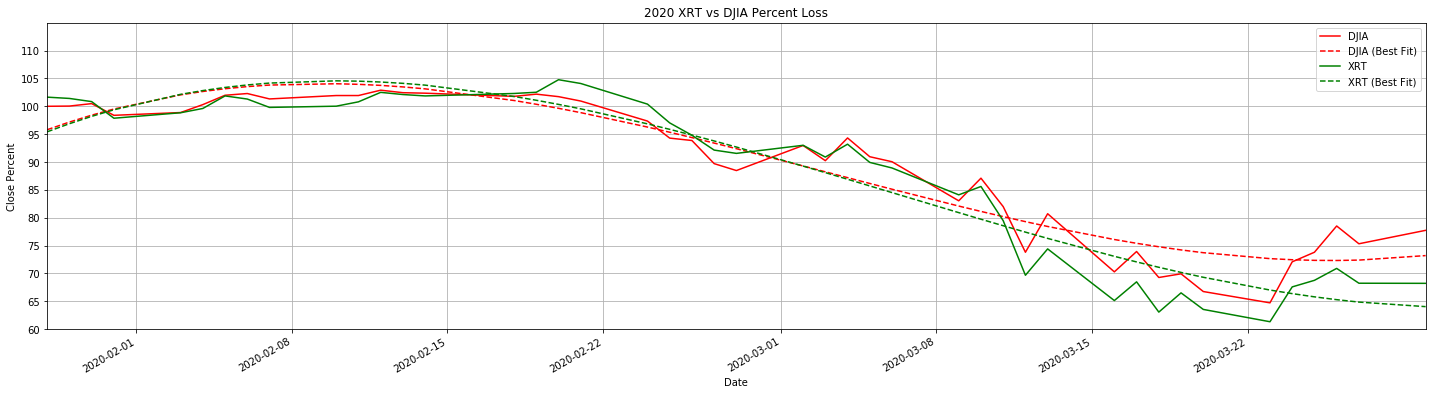

In [13]:
XRT_DJI_chart = plot_data(dji_df, xrt_df, '2020 XRT vs DJIA Percent Loss', 'DJIA', 'XRT')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


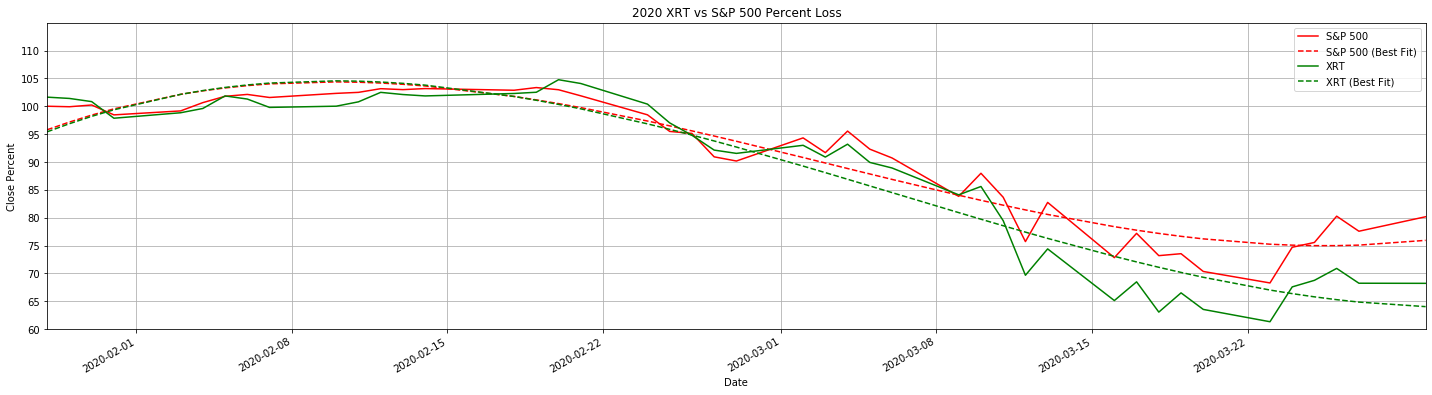

In [14]:
XRT_INX_chart = plot_data(inx_df, xrt_df, '2020 XRT vs S&P 500 Percent Loss', 'S&P 500', 'XRT')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


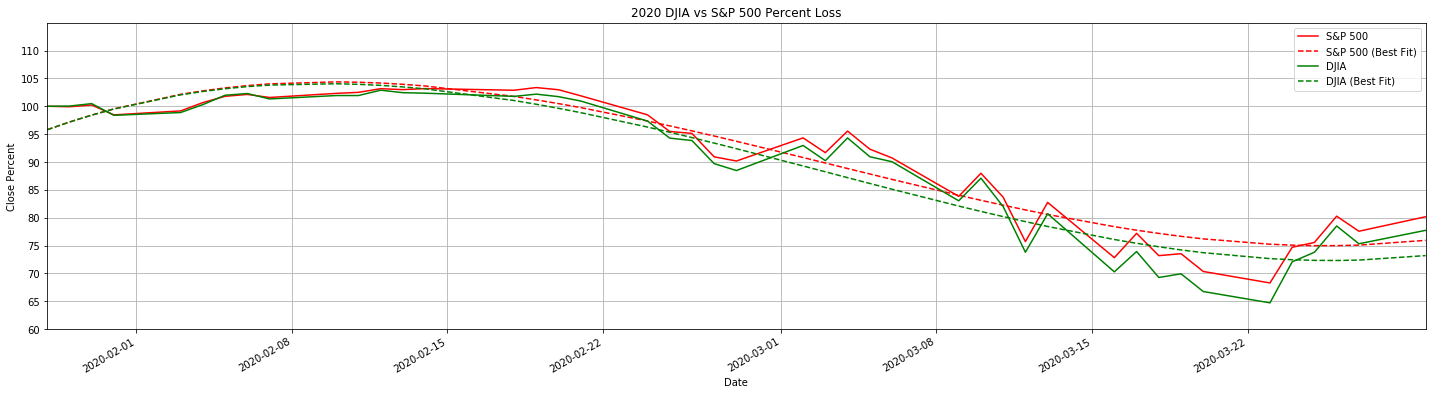

In [15]:
DJI_INX_chart = plot_data(inx_df, dji_df, '2020 DJIA vs S&P 500 Percent Loss', 'S&P 500', 'DJIA')